<a href="https://colab.research.google.com/github/vahid-nejad/Keras_LTMS_timeseries_predictins/blob/main/keras_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
# importing the necessary packages
import numpy as np
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.models import Sequential

In [128]:
# preparing data set
def prepareDateSet(timeSeriesData,numberOfSteps=3):
    x,y=[],[]
    for i in range(len(timeSeriesData)):
        currentYIndex= i+numberOfSteps
        if currentYIndex > len(timeSeriesData) - 1:
            break
        x.append(timeSeriesData[i:currentYIndex])
        y.append(timeSeriesData[currentYIndex])

    return np.array(x) ,np.array(y)


In [129]:
timeSeriesData = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
numberOfSteps = 3
# split into samples
X, y = prepareDateSet(timeSeriesData, n_steps)

In [130]:
print(X)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


In [131]:
X.shape

(6, 3)

In [132]:
# turn the x array into a 3 dimensional array
numberOfFeature = 1
X=X.reshape(X.shape[0],X.shape[1],numberOfFeature)

In [133]:
X.shape

(6, 3, 1)

#Building the LSTM model

In [134]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(numberOfSteps, numberOfFeature)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

In [135]:
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 31775.3691
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 31241.0254
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 30714.5723
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 30196.2734
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 29656.3223
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 29060.9668
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 28382.2012
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 27620.1230
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 26789.1953
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 25911.4297
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 24998.5645
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 24072.2090
Epoch 13

#Making predictions

In [136]:
def makePredictions(numberOfPredictions,timeSeriesData):
    inputData=timeSeriesData[-3:]
    outPut=[]
    for i in range(numberOfPredictions):
        x_input=np.array(inputData).astype('float32').reshape(1,numberOfSteps,numberOfFeature)
        
        y=model.predict(x_input)
        outPut.append(y[0][0])
        inputData.append(y)
        inputData=inputData[1:]
    return outPut

In [137]:
predictions=makePredictions(10, timeSeriesData)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [138]:
predictions

[229.83315,
 243.73032,
 262.042,
 282.4308,
 301.30524,
 323.44174,
 346.86624,
 370.9088,
 397.55872,
 425.7183]

#Visualizing the outpot prediction

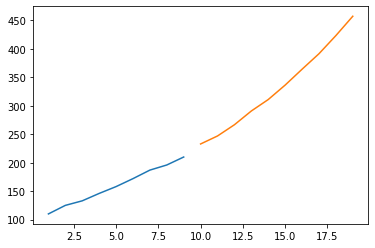

In [139]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.plot(day_new,timeSeriesData)
plt.plot(day_pred,predictions)

#Let's increase the number of epochs and fit the model to see if we get better result

In [140]:
model.fit(X, y, epochs=400, verbose=1)

Epoch 1/400
1/1 [==============================] - 0s 8ms/step - loss: 8.6455
Epoch 2/400
1/1 [==============================] - 0s 9ms/step - loss: 8.3545
Epoch 3/400
1/1 [==============================] - 0s 10ms/step - loss: 8.0369
Epoch 4/400
1/1 [==============================] - 0s 12ms/step - loss: 7.7442
Epoch 5/400
1/1 [==============================] - 0s 11ms/step - loss: 7.4224
Epoch 6/400
1/1 [==============================] - 0s 7ms/step - loss: 7.0774
Epoch 7/400
1/1 [==============================] - 0s 8ms/step - loss: 6.8015
Epoch 8/400
1/1 [==============================] - 0s 6ms/step - loss: 6.4583
Epoch 9/400
1/1 [==============================] - 0s 8ms/step - loss: 6.1442
Epoch 10/400
1/1 [==============================] - 0s 6ms/step - loss: 5.9003
Epoch 11/400
1/1 [==============================] - 0s 6ms/step - loss: 5.5799
Epoch 12/400
1/1 [==============================] - 0s 6ms/step - loss: 5.3487
Epoch 13/400
1/1 [==============================] - 0s 6ms

In [141]:
predictions=makePredictions(10, timeSeriesData)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


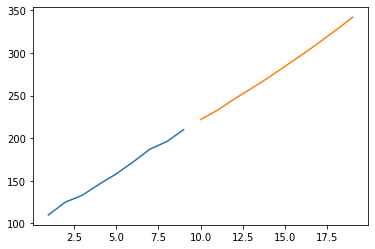

In [143]:
plt.plot(day_new,timeSeriesData)
plt.plot(day_pred,predictions)

#This time we get a more straight prediction line